# BAIT 508 Group Project - Section BA1 #

## Team Members ##

**Zhi (Krystal) Li - 95680609**

**Yousef Jafarnia - 37746765**

**Pranav Mehta - 19184282**




In [34]:
# importing libraries and packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud
from gensim.models import Word2Vec

# Part1 - Quantitative Analysis of the Industry Sector #

## Initial Exploration ##

In [37]:
# importing the first dataset and exploring the contents

groups = pd.read_csv("major_groups.csv")
print(groups.shape)
groups.head()

(83, 2)


,major_group,description
0,1,Agricultural Production Crops
1,2,Agriculture production livestock and animal sp...
2,7,Agricultural Services
3,8,Forestry
4,9,Fishing hunting and trapping


In [38]:
# checking quality of the input data

print(groups.isnull().sum())
print(f"the number of duplicate records is {groups.duplicated().sum()}")

major_group    0
description    0
dtype: int64
the number of duplicate records is 0


In [39]:
# importing the second dataset and exploring the contents

firms = pd.read_csv("public_firms.csv")
print(firms.shape)
firms.head()

(209212, 12)


,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
0,1004,1994,USA,AAR CORP,1988/01/01,5080,13.375,22.487,10.463,425.814,451.395,0.024572
1,1004,1995,USA,AAR CORP,1988/01/01,5080,22.000,33.606,16.012,437.846,504.990,0.036570
2,1004,1996,USA,AAR CORP,1988/01/01,5080,30.250,51.705,23.025,529.584,589.328,0.043478
3,1004,1997,USA,AAR CORP,1988/01/01,5080,38.750,17.222,35.657,670.559,782.123,0.053175
4,1004,1998,USA,AAR CORP,1988/01/01,5080,23.875,8.250,41.671,726.630,918.036,0.057348


In [40]:
# checking quality of the input data

print(firms.isnull().sum())
print(f"the number of duplicate records is {firms.duplicated().sum()}")

gvkey           0
fyear           0
location        0
conm            0
ipodate     98340
sic             0
prcc_c      25962
ch           2898
ni           5840
asset           0
sale         5852
roa          5840
dtype: int64
the number of duplicate records is 0


In [41]:
# exploring the main statistics of the numeric columns

firms.describe()

,gvkey,fyear,sic,prcc_c,ch,ni,asset,sale,roa
count,209212.000000,209212.000000,209212.000000,183250.000000,206314.000000,203372.000000,2.092120e+05,203360.000000,203372.000000
mean,64544.481253,2006.174058,4934.190830,30.735469,453.593102,158.808121,9.682521e+03,2710.560916,-0.434241
std,64819.205863,7.560332,2019.146853,772.198163,5802.914337,1364.881252,8.692652e+04,13410.107004,57.542790
min,1004.000000,1994.000000,1000.000000,0.000100,-279.141000,-99289.000000,1.010000e-01,-15009.328000,-25884.807692
25%,13554.000000,1999.000000,3510.000000,2.950000,2.353000,-5.044000,3.941100e+01,19.421750,-0.102663
50%,30007.000000,2005.000000,4911.000000,11.312000,15.100000,2.446000,2.941140e+02,135.467500,0.010749
75%,117902.000000,2013.000000,6351.000000,26.430000,81.063000,42.200250,1.733667e+03,908.722750,0.054844
max,347085.000000,2020.000000,9998.000000,141600.000000,656125.678000,104821.000000,3.985749e+06,556933.000000,400.535211


## A. Industry Sector Selection and Data Filtering ##

In [43]:
# finding the health services in the major_groups.csv

print(groups[groups['description'].str.contains('Health', case=False, na=False)])


    major_group      description
66           80  Health Services


In [44]:
# Filter out firms in the desired industry sector 
sector = 80 # Health Services
selected_sector_firms = firms[firms['sic'] // 100 == sector]
selected_sector_firms.head(10)

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
1588,1431,1994,USA,AMERICAN CYTOGENETICS,NaN,8071,NaN,0.035,-0.205,1.339,5.454,-0.153099
1589,1431,1995,USA,AMERICAN CYTOGENETICS,NaN,8071,0.0310,0.020,-0.484,1.124,4.682,-0.430605
2064,1559,1995,USA,AMERICAN SHARED HSPTL SERV,NaN,8090,1.3120,0.452,7.344,31.345,34.077,0.234296
2065,1559,1996,USA,AMERICAN SHARED HSPTL SERV,NaN,8090,1.8120,0.368,-0.353,32.969,36.989,-0.010707
2066,1559,1997,USA,AMERICAN SHARED HSPTL SERV,NaN,8090,1.7500,0.017,1.522,30.209,37.172,0.050382
2067,1559,1998,USA,AMERICAN SHARED HSPTL SERV,NaN,8090,1.1875,11.114,20.051,26.919,35.162,0.744864
2068,1559,1999,USA,AMERICAN SHARED HSPTL SERV,NaN,8090,4.2500,12.903,2.707,36.986,7.156,0.073190
2069,1559,2000,USA,AMERICAN SHARED HSPTL SERV,NaN,8090,2.2500,12.421,1.312,40.209,9.336,0.032630
2070,1559,2001,USA,AMERICAN SHARED HSPTL SERV,NaN,8090,3.0200,11.580,1.068,42.385,11.758,0.025198
2071,1559,2002,USA,AMERICAN SHARED HSPTL SERV,NaN,8090,4.1100,9.924,1.102,44.830,13.366,0.024582


In [45]:
# Count unique firm-year

unique_pairs = selected_sector_firms[['fyear', 'gvkey']].drop_duplicates()
unique_pair_count = unique_pairs.shape[0]
print(f'There are {unique_pair_count} unique firm-year observations in the filtered dataset.')

# Count unique firms

unique_firm_count = selected_sector_firms['gvkey'].nunique()
print(f'There are {unique_firm_count} unique firms in the filtered dataset.')

# Count firms which have records over all 27 years (1994-2020)

year_num_df = selected_sector_firms.groupby('gvkey').size().reset_index(name='year_num')
twenty_seven_years = year_num_df[year_num_df['year_num'] == 27].shape[0]
print(f'{twenty_seven_years} firms in the filtered dataset have records over all 27 years (1994-2020).')

There are 3064 unique firm-year observations in the filtered dataset.
There are 358 unique firms in the filtered dataset.
2 firms in the filtered dataset have records over all 27 years (1994-2020).


## B. Preliminary Analysis ##

#### 1. The top 10 firms with the highest stock price in 2020

In [48]:
year2020 = selected_sector_firms[selected_sector_firms['fyear'] == 2020]
year2020.sort_values('prcc_c', ascending=False)[['conm', 'prcc_c']].head(10)

,conm,prcc_c
7723,CHEMED CORP,532.61
107521,AMEDISYS INC,293.33
183851,LHC GROUP INC,213.32
58187,LABORATORY CP OF AMER HLDGS,203.55
82137,TELADOC HEALTH INC,199.96
77060,HCA HEALTHCARE INC,164.46
41013,UNIVERSAL HEALTH SVCS INC,137.50
87614,U S PHYSICAL THERAPY INC,120.25
135469,QUEST DIAGNOSTICS INC,119.17
121189,DAVITA INC,117.40


#### 2. The top 10 firms with the highest sales in the entire history of the dataset

In [50]:
selected_sector_firms.groupby('conm')['sale'].sum().reset_index().sort_values('sale', ascending=False)[['conm', 'sale']].head(10)

,conm,sale
130,HCA HEALTHCARE INC,765445.000
326,TENET HEALTHCARE CORP,322940.000
117,FRESENIUS MEDICAL CARE AG&CO,270953.523
69,COMMUNITY HEALTH SYSTEMS INC,215654.733
84,DAVITA INC,157702.707
271,QUEST DIAGNOSTICS INC,146895.716
343,UNIVERSAL HEALTH SVCS INC,144328.980
178,LABORATORY CP OF AMER HLDGS,134399.500
174,KINDRED HEALTHCARE INC,96953.895
98,ENCOMPASS HEALTH CORP,82040.121


#### 3. The top 10 locations with most firms

In [52]:
selected_sector_firms.drop_duplicates(['conm','location']).groupby('location').size().reset_index(name='firm_count').sort_values('firm_count', ascending=False).head(10)

,location,firm_count
5,USA,344
1,CAN,5
2,CHN,5
4,HKG,2
0,AUS,1
3,DEU,1


#### 4. Plot the average stock price in the selected sector(s) across the years

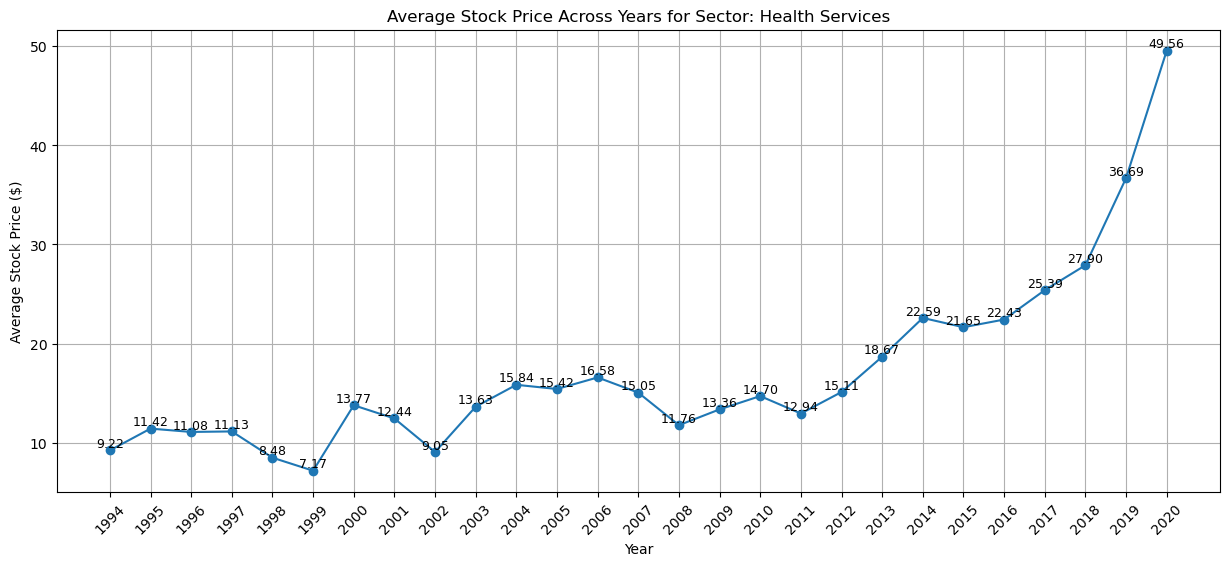

In [54]:
#Used ChatGPT-4 to annotate each data point on the graph. My prompt was 'Add a piece of code to annotate the data points in the graph.'

# Calculate the average stock price for each year
avg_stock_price = selected_sector_firms.groupby('fyear', as_index=False)['prcc_c'].mean()

# Create a line chart
plt.figure(figsize=(15, 6))

# Plot the average stock price over the years
plt.plot(avg_stock_price['fyear'], avg_stock_price['prcc_c'], marker='o')

# Annotate each data point with its coordinates
for i in range(len(avg_stock_price)):
    plt.text(
        avg_stock_price['fyear'].iloc[i], 
        avg_stock_price['prcc_c'].iloc[i], 
        f'{avg_stock_price["prcc_c"].iloc[i]:.2f}',  # Format as (x, y)
        fontsize=9,
        ha='center',  # Horizontal alignment
        va='bottom'   # Vertical alignment
    )

# Customize the plot
plt.title(f'Average Stock Price Across Years for Sector: {groups[groups['major_group']==sector]['description'].iloc[0]}')
plt.xlabel('Year')
plt.ylabel('Average Stock Price ($)')
plt.xticks(avg_stock_price['fyear'].unique(), rotation=45)
plt.grid()
plt.show()

#### 5. The most affected firm by the 2008 Financial Crisis

In [56]:
# Filter out year 2007 and 2008
records_of_crisis_years = selected_sector_firms[selected_sector_firms['fyear'].isin([2007, 2008])]

# Create a pivot table
records_of_crisis_years_pivot = records_of_crisis_years.pivot(index='conm', columns='fyear', values='prcc_c').dropna()

# Calculate each firm's stock price drop from 2007 to 2008
records_of_crisis_years_pivot['stock_price_drop(%)'] = (records_of_crisis_years_pivot[2008] - records_of_crisis_years_pivot[2007]) / records_of_crisis_years_pivot[2007] * 100

# Find the company with the least stock price drop
least_drop_index = records_of_crisis_years_pivot['stock_price_drop(%)'].idxmin()
least_drop_value = records_of_crisis_years_pivot['stock_price_drop(%)'].min()

print(f"The firm affected the least by the 2008 financial crisis is: {least_drop_index} "
      f"with a percentage drop of {least_drop_value:.2f}%")

The firm affected the least by the 2008 financial crisis is: INSIGHT HEALTH SVCS HLDG CP with a percentage drop of -99.33%


#### 6. Plot the average ROA for the firms located in the USA across the years

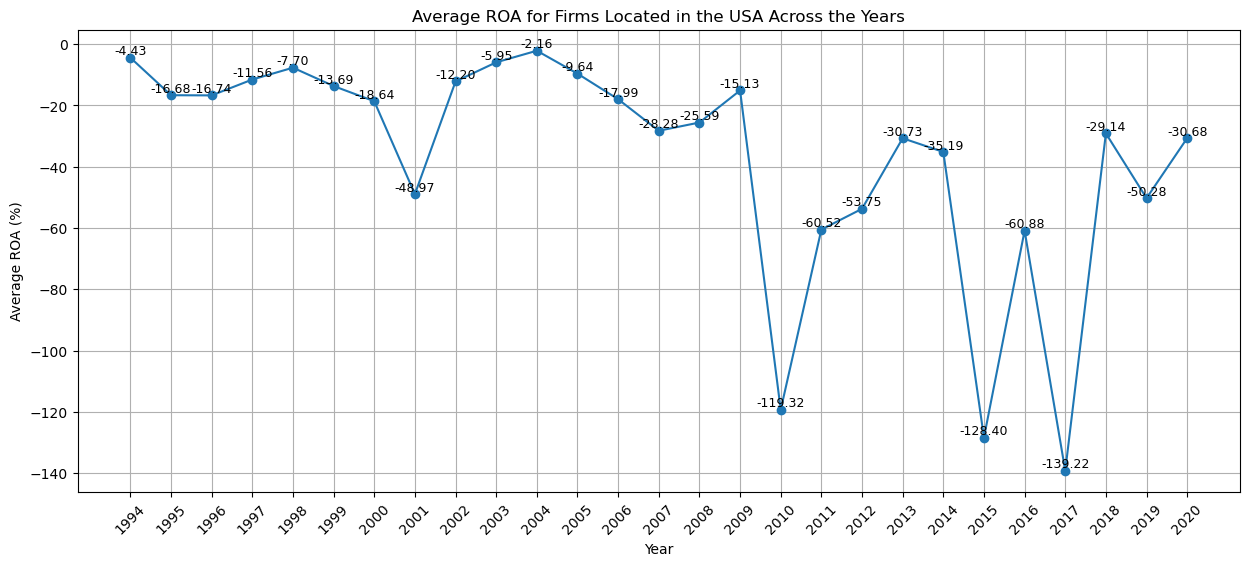

In [58]:
#Used ChatGPT-4 to annotate each data point on the graph. My prompt was 'Add a piece of code to annotate the data points in the graph.'

# Filter out the firms in the USA
USA_selected_sector_firms = selected_sector_firms[selected_sector_firms['location'] == 'USA'].copy() # to avoid the SettingWithCopyWarning

# Calculate ROA
USA_selected_sector_firms['ROA(%)'] = (USA_selected_sector_firms['ni'] / USA_selected_sector_firms['asset']) * 100

# Calculate average ROA for each year
average_roa = USA_selected_sector_firms.groupby('fyear', as_index=False)['ROA(%)'].mean().round(2)

# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(average_roa['fyear'], average_roa['ROA(%)'], marker='o', linestyle='-')

for i in range(len(average_roa)):
    plt.text(
        average_roa['fyear'].iloc[i], 
        average_roa['ROA(%)'].iloc[i], 
        f'{average_roa["ROA(%)"].iloc[i]:.2f}',  # Format as (x, y)
        fontsize=9,
        ha='center',  
        va='bottom'
    )

# Customize the plot
plt.title('Average ROA for Firms Located in the USA Across the Years')
plt.xlabel('Year')
plt.ylabel('Average ROA (%)')
plt.xticks(average_roa['fyear'], rotation=45)
plt.grid()
plt.show()


# Part2 - Text Analysis on the Industry Sector #

## Initial Exploration ##

In [61]:
# importing the third dataset and exploring the contents

all_10k_reports = pd.read_csv("2020_10K_item1_full.csv")
print(all_10k_reports.shape)
all_10k_reports.head()

(5481, 5)


,cik,year,name,item_1_text,gvkey
0,1041588,2020,ACCESS-POWER INC,fixed expenses are previosuly documented in an...,66119
1,315374,2020,HURCO COMPANIES INC,"General Hurco Companies, Inc. is an internatio...",5788
2,1622996,2020,"ACRO BIOMEDICAL CO., LTD.",We have been engaged in the business of develo...,27584
3,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614
4,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614


In [62]:
# checking quality of the input data

print(all_10k_reports.isnull().sum())
print(f"the number of duplicate records is {all_10k_reports.duplicated(['item_1_text']).sum()}")

cik            0
year           0
name           0
item_1_text    0
gvkey          0
dtype: int64
the number of duplicate records is 962


## C. Text Cleaning ##

In [64]:
# 0. removing duplicates

all_10k_reports_cleaned = all_10k_reports.drop_duplicates(['item_1_text'])

In [65]:
# 1. Converting all words to lowercase
# 2. Removing punctuation.
# 3. Removing stop words using NLTK.

translator = str.maketrans('', '', string.punctuation)
sw = stopwords.words('english')

def clean_text(text):
    text_lower = text.lower() 
    text_no_punctuation = text_lower.translate(translator)  
    clean_words = [w for w in text_no_punctuation.split() if w not in sw] 
    return ' '.join(clean_words)

all_10k_reports_cleaned.loc[:, 'item_1_cleaned'] = all_10k_reports_cleaned['item_1_text'].apply(clean_text)

C:\Users\prana\AppData\Local\Temp\ipykernel_5852\2020114946.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_10k_reports_cleaned.loc[:, 'item_1_cleaned'] = all_10k_reports_cleaned['item_1_text'].apply(clean_text)


## D. Keyword Analysis ##

In [67]:
# step 1: creating the data frame for the firms in the selected sector

selected_firms_10k_reports = all_10k_reports_cleaned.merge(selected_sector_firms[selected_sector_firms['fyear'] == 2019], on='gvkey', how='inner')
print(selected_firms_10k_reports.shape)
selected_firms_10k_reports.head()

(57, 17)


,cik,year,name,item_1_text,gvkey,item_1_cleaned,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
0,1516887,2020,"Wellness Center USA, Inc.","Background. Wellness Center USA, Inc. ( WCUI ...",170692,background wellness center usa inc wcui compan...,2019,USA,WELLNESS CENTER USA INC,NaN,8000,0.0403,0.053,-2.388,0.110,0.033,-21.709091
1,1125376,2020,"ENSIGN GROUP, INC","Founded in 1999, The Ensign Group, Inc. ( Ensi...",178803,founded 1999 ensign group inc ensign holding c...,2019,USA,ENSIGN GROUP INC,2007/11/09,8051,45.3700,59.175,110.534,2361.909,2036.524,0.046799
2,896262,2020,AMEDISYS INC,"Overview Amedisys, Inc. is a leading healthcar...",30612,overview amedisys inc leading healthcare servi...,2019,USA,AMEDISYS INC,NaN,8082,166.9200,30.294,126.833,1262.745,1962.174,0.100442
3,1332349,2020,Brookdale Senior Living Inc.,"Unless otherwise specified, references to Bro...",164652,unless otherwise specified references brookdal...,2019,USA,BROOKDALE SENIOR LIVING INC,2005/11/22,8050,7.2700,240.227,-267.931,7194.433,4057.088,-0.037241
4,1022079,2020,QUEST DIAGNOSTICS INC,INTRODUCTION Quest Diagnostics Incorporated is...,64166,introduction quest diagnostics incorporated wo...,2019,USA,QUEST DIAGNOSTICS INC,1996/12/17,8071,106.7900,1192.000,858.000,12843.000,7726.000,0.066807


In [68]:
# Step 2 - 1: generating top 10 keywords for each firm based on word counts

def get_keywords_wordcounts(text):
    c = Counter(str(text).split())
    words = []
    for pair in c.most_common(10):
        words.append(pair[0])
    return ' '.join(words) 

selected_firms_10k_reports['keywords_wordcounts'] = \
selected_firms_10k_reports['item_1_cleaned'].apply(get_keywords_wordcounts)

selected_firms_10k_reports.head()

,cik,year,name,item_1_text,gvkey,item_1_cleaned,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,keywords_wordcounts
0,1516887,2020,"Wellness Center USA, Inc.","Background. Wellness Center USA, Inc. ( WCUI ...",170692,background wellness center usa inc wcui compan...,2019,USA,WELLNESS CENTER USA INC,NaN,8000,0.0403,0.053,-2.388,0.110,0.033,-21.709091,psi mark company microparticle psorialight dti...
1,1125376,2020,"ENSIGN GROUP, INC","Founded in 1999, The Ensign Group, Inc. ( Ensi...",178803,founded 1999 ensign group inc ensign holding c...,2019,USA,ENSIGN GROUP INC,2007/11/09,8051,45.3700,59.175,110.534,2361.909,2036.524,0.046799,services care facilities nursing skilled medic...
2,896262,2020,AMEDISYS INC,"Overview Amedisys, Inc. is a leading healthcar...",30612,overview amedisys inc leading healthcare servi...,2019,USA,AMEDISYS INC,NaN,8082,166.9200,30.294,126.833,1262.745,1962.174,0.100442,care health home medicare payment services hos...
3,1332349,2020,Brookdale Senior Living Inc.,"Unless otherwise specified, references to Bro...",164652,unless otherwise specified references brookdal...,2019,USA,BROOKDALE SENIOR LIVING INC,2005/11/22,8050,7.2700,240.227,-267.931,7194.433,4057.088,-0.037241,communities living services care senior health...
4,1022079,2020,QUEST DIAGNOSTICS INC,INTRODUCTION Quest Diagnostics Incorporated is...,64166,introduction quest diagnostics incorporated wo...,2019,USA,QUEST DIAGNOSTICS INC,1996/12/17,8071,106.7900,1192.000,858.000,12843.000,7726.000,0.066807,services healthcare health information testing...


In [69]:
# Step 2 - 2: generating top 10 keywords for each firm based on TF-IDF


def get_keywords_tfidf(documents):
    vectorizer = TfidfVectorizer()   
    tfidf_matrix = vectorizer.fit_transform(documents)  
    feature_names = vectorizer.get_feature_names_out()
    top_keywords = [] # accumulator
    for i in range(tfidf_matrix.shape[0]):
        feature_index = tfidf_matrix[i, :].nonzero()[1]
        tfidf_scores = zip(feature_index, [tfidf_matrix[i, x] for x in feature_index])    
        sorted_tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)  
        top_keywords.append(' '.join([feature_names[i] for i, _ in sorted_tfidf_scores[:10]]))
    
    return top_keywords

selected_firms_10k_reports['keywords_tfidf'] = \
get_keywords_tfidf(selected_firms_10k_reports['item_1_cleaned'])

selected_firms_10k_reports.head()

,cik,year,name,item_1_text,gvkey,item_1_cleaned,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,keywords_wordcounts,keywords_tfidf
0,1516887,2020,"Wellness Center USA, Inc.","Background. Wellness Center USA, Inc. ( WCUI ...",170692,background wellness center usa inc wcui compan...,2019,USA,WELLNESS CENTER USA INC,NaN,8000,0.0403,0.053,-2.388,0.110,0.033,-21.709091,psi mark company microparticle psorialight dti...,psi microparticle dti psorialight mark gen2 uv...
1,1125376,2020,"ENSIGN GROUP, INC","Founded in 1999, The Ensign Group, Inc. ( Ensi...",178803,founded 1999 ensign group inc ensign holding c...,2019,USA,ENSIGN GROUP INC,2007/11/09,8051,45.3700,59.175,110.534,2361.909,2036.524,0.046799,services care facilities nursing skilled medic...,nursing skilled services facilities care livin...
2,896262,2020,AMEDISYS INC,"Overview Amedisys, Inc. is a leading healthcar...",30612,overview amedisys inc leading healthcare servi...,2019,USA,AMEDISYS INC,NaN,8082,166.9200,30.294,126.833,1262.745,1962.174,0.100442,care health home medicare payment services hos...,care hospice health home medicare payment serv...
3,1332349,2020,Brookdale Senior Living Inc.,"Unless otherwise specified, references to Bro...",164652,unless otherwise specified references brookdal...,2019,USA,BROOKDALE SENIOR LIVING INC,2005/11/22,8050,7.2700,240.227,-267.931,7194.433,4057.088,-0.037241,communities living services care senior health...,living communities senior care services reside...
4,1022079,2020,QUEST DIAGNOSTICS INC,INTRODUCTION Quest Diagnostics Incorporated is...,64166,introduction quest diagnostics incorporated wo...,2019,USA,QUEST DIAGNOSTICS INC,1996/12/17,8071,106.7900,1192.000,858.000,12843.000,7726.000,0.066807,services healthcare health information testing...,services testing healthcare diagnostic health ...


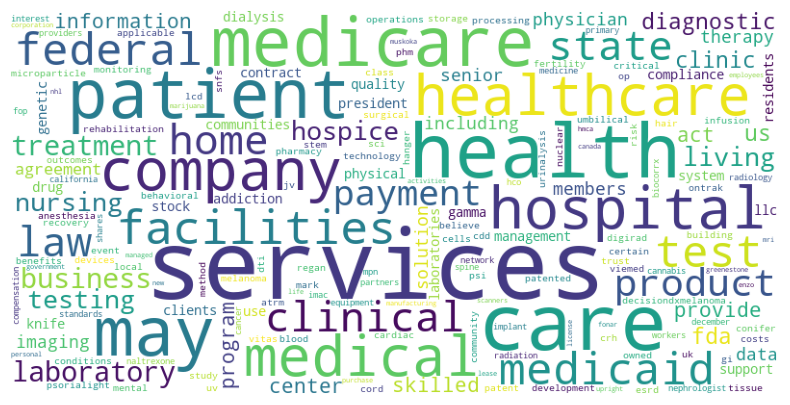

In [70]:
# Step 3 - 1: creating wordcloud of the keywords based on word counts

text1 = ' '.join(selected_firms_10k_reports['keywords_wordcounts'].tolist())

wordcloud_wordcounts = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(text1)

plt.figure(figsize=(10,5))
plt.axis('off')
plt.imshow(wordcloud_wordcounts)
plt.show()

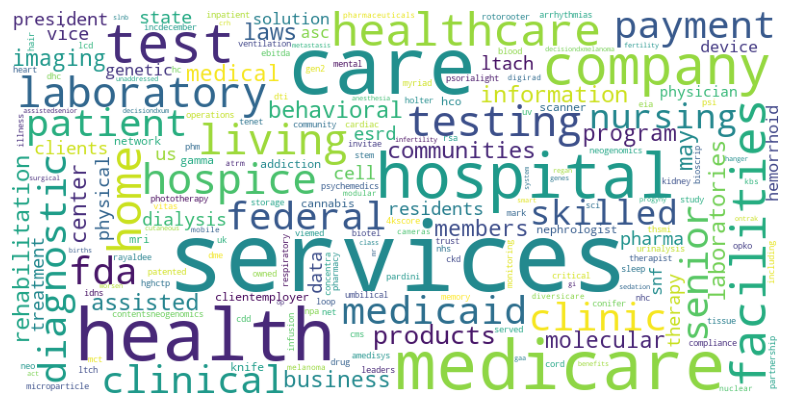

In [71]:
# Step 3 - 2: creating wordcloud of the keywords based on TF-IDF

text2 = ' '.join(selected_firms_10k_reports['keywords_tfidf'].tolist())

wordcloud_tfidf = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(text2)

plt.figure(figsize=(10,5))
plt.axis('off')
plt.imshow(wordcloud_tfidf)
plt.show()

## E. Word embedding ##

In [73]:
# 1. training a word2vec model

docs_for_training = [row.split() for row in all_10k_reports_cleaned['item_1_cleaned']]

w2v_model = Word2Vec(docs_for_training, min_count=5, vector_size=50, workers=3, window=5, sg = 1)

In [74]:
w2v_model.save("word2vec.model")

In [75]:
# 2. finding similar words for the List of three chosen keywords
chosen_keywords = ['care', 'health', 'services']

for keyword in chosen_keywords:
    similar_words = w2v_model.wv.most_similar(keyword, topn=5)
    print(f"\nMost relevant words for '{keyword}':")
    for word, score in similar_words:
        print(f"{word}: {score:.4f}")



Most relevant words for 'care':
healthcare: 0.8193
postacute: 0.7939
homebased: 0.7870
nonacute: 0.7765
•physician: 0.7761

Most relevant words for 'health':
care: 0.7702
healthrelated: 0.7660
bioterrorism: 0.7644
dhhs: 0.7632
•health: 0.7622

Most relevant words for 'services':
atmrelated: 0.8327
softwarerelated: 0.8301
solutions: 0.8016
•services: 0.7996
•managed: 0.7991


# Part3 - Comprehensive Analysis of One Sample Firm #

In [77]:
#I used ChatGPT 4 to add a new column ("firm_level_embedding") to the dataframe ("selected_firms_10k_reports"). My prompt was: 'Here is my code for generating the top 10 keywords based on the TF-IDF score and the code where I trained a Word2Vec model. I need your help to come up with code for firm-level embedding.

import numpy as np
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert keywords to embeddings and aggregate them
def get_firm_embeddings(keywords_list, model):
    firm_embeddings = []  # List to store firm-level embeddings
    vector_size = model.vector_size  # The size of word vectors in Word2Vec
    
    for keywords in keywords_list:  # Loop through each firm's keywords
        word_embeddings = []  # List to store word embeddings for current firm
        
        for word in keywords:  # Loop through each keyword
            if word in model.wv:  # Check if the keyword exists in Word2Vec vocabulary
                word_embeddings.append(model.wv[word])
            else:
                # If the word is not in the vocabulary, you can either skip it or use a zero vector
                word_embeddings.append(np.zeros(vector_size))
        
        # If we have any embeddings for the firm, aggregate them (e.g., by averaging)
        if word_embeddings:
            firm_embedding = np.mean(word_embeddings, axis=0)  # Aggregate by taking the mean
            firm_embeddings.append(firm_embedding)
        else:
            # If no embeddings were found (e.g., no valid keywords), append a zero vector for the firm
            firm_embeddings.append(np.zeros(vector_size))
    
    return firm_embeddings

# Get firm-level embeddings
firm_level_embeddings = get_firm_embeddings(selected_firms_10k_reports['keywords_tfidf'], w2v_model)

# Adding the firm-level embeddings to the DataFrame
selected_firms_10k_reports['firm_level_embedding'] = firm_level_embeddings

# Displaying the first few rows with firm-level embeddings
selected_firms_10k_reports.head()


,cik,year,name,item_1_text,gvkey,item_1_cleaned,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,keywords_wordcounts,keywords_tfidf,firm_level_embedding
0,1516887,2020,"Wellness Center USA, Inc.","Background. Wellness Center USA, Inc. ( WCUI ...",170692,background wellness center usa inc wcui compan...,2019,USA,WELLNESS CENTER USA INC,NaN,8000,0.0403,0.053,-2.388,0.110,0.033,-21.709091,psi mark company microparticle psorialight dti...,psi microparticle dti psorialight mark gen2 uv...,"[0.1201899486468799, -0.12980690520645968, 0.0..."
1,1125376,2020,"ENSIGN GROUP, INC","Founded in 1999, The Ensign Group, Inc. ( Ensi...",178803,founded 1999 ensign group inc ensign holding c...,2019,USA,ENSIGN GROUP INC,2007/11/09,8051,45.3700,59.175,110.534,2361.909,2036.524,0.046799,services care facilities nursing skilled medic...,nursing skilled services facilities care livin...,"[0.13970496251909847, -0.17374987458159408, -0..."
2,896262,2020,AMEDISYS INC,"Overview Amedisys, Inc. is a leading healthcar...",30612,overview amedisys inc leading healthcare servi...,2019,USA,AMEDISYS INC,NaN,8082,166.9200,30.294,126.833,1262.745,1962.174,0.100442,care health home medicare payment services hos...,care hospice health home medicare payment serv...,"[0.1420257174291871, -0.14342097555037955, -0...."
3,1332349,2020,Brookdale Senior Living Inc.,"Unless otherwise specified, references to Bro...",164652,unless otherwise specified references brookdal...,2019,USA,BROOKDALE SENIOR LIVING INC,2005/11/22,8050,7.2700,240.227,-267.931,7194.433,4057.088,-0.037241,communities living services care senior health...,living communities senior care services reside...,"[0.1373685149069971, -0.14514568937608066, -0...."
4,1022079,2020,QUEST DIAGNOSTICS INC,INTRODUCTION Quest Diagnostics Incorporated is...,64166,introduction quest diagnostics incorporated wo...,2019,USA,QUEST DIAGNOSTICS INC,1996/12/17,8071,106.7900,1192.000,858.000,12843.000,7726.000,0.066807,services healthcare health information testing...,services testing healthcare diagnostic health ...,"[0.13255552721776717, -0.16049531555694083, -0..."


In [78]:
#I used ChatGPT-4 to generate a new dataframe, 'top_5_competitors_display,' to store the top 5 competitor firms based on their similarity scores. My prompt was to give me the top 5 competitor firms for Tenet Healthcare (gvkey = 7750) based on their firm-level embeddings and similarity to Tenet's score. 

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Get the embedding for "TENET HEALTHCARE CORP" (gvkey = 7750)
tenet_embedding = selected_firms_10k_reports.loc[selected_firms_10k_reports['gvkey'] == 7750, 'firm_level_embedding'].values[0]

# Step 2: Create a matrix of all firm embeddings
firm_embeddings_matrix = np.vstack(selected_firms_10k_reports['firm_level_embedding'].values)

# Step 3: Calculate cosine similarities between TENET HEALTHCARE CORP and all other firms
similarities = cosine_similarity([tenet_embedding], firm_embeddings_matrix)[0]

# Step 4: Add similarities to the dataframe
selected_firms_10k_reports['similarity_to_tenet'] = similarities

# Step 5: Find the top 5 competitors by sorting similarity scores (excluding TENET itself)
top_5_competitors = selected_firms_10k_reports[selected_firms_10k_reports['gvkey'] != 7750].nlargest(5, 'similarity_to_tenet')

# Display the top 5 competitors
top_5_competitors_display = top_5_competitors[['gvkey', 'similarity_to_tenet', 'name']]  

top_5_competitors_display

,gvkey,similarity_to_tenet,name
14,12589,0.997779,Encompass Health Corp
51,183283,0.997381,Addus HomeCare Corp
6,23714,0.997201,COMMUNITY HEALTH SYSTEMS INC
15,162404,0.996298,"LHC Group, Inc"
5,174236,0.996014,SELECT MEDICAL HOLDINGS CORP


In [79]:
# List of gvkeys from the top 5 competitors, including TENET HEALTHCARE CORP (gvkey = 7750)
selected_gvkeys = [11032, 26157, 25318, 30175, 23714, 7750]

# Filter the selected_sector_firms dataframe to include only these gvkeys
new_selected_firms_df = selected_sector_firms[selected_sector_firms['gvkey'].isin(selected_gvkeys)]

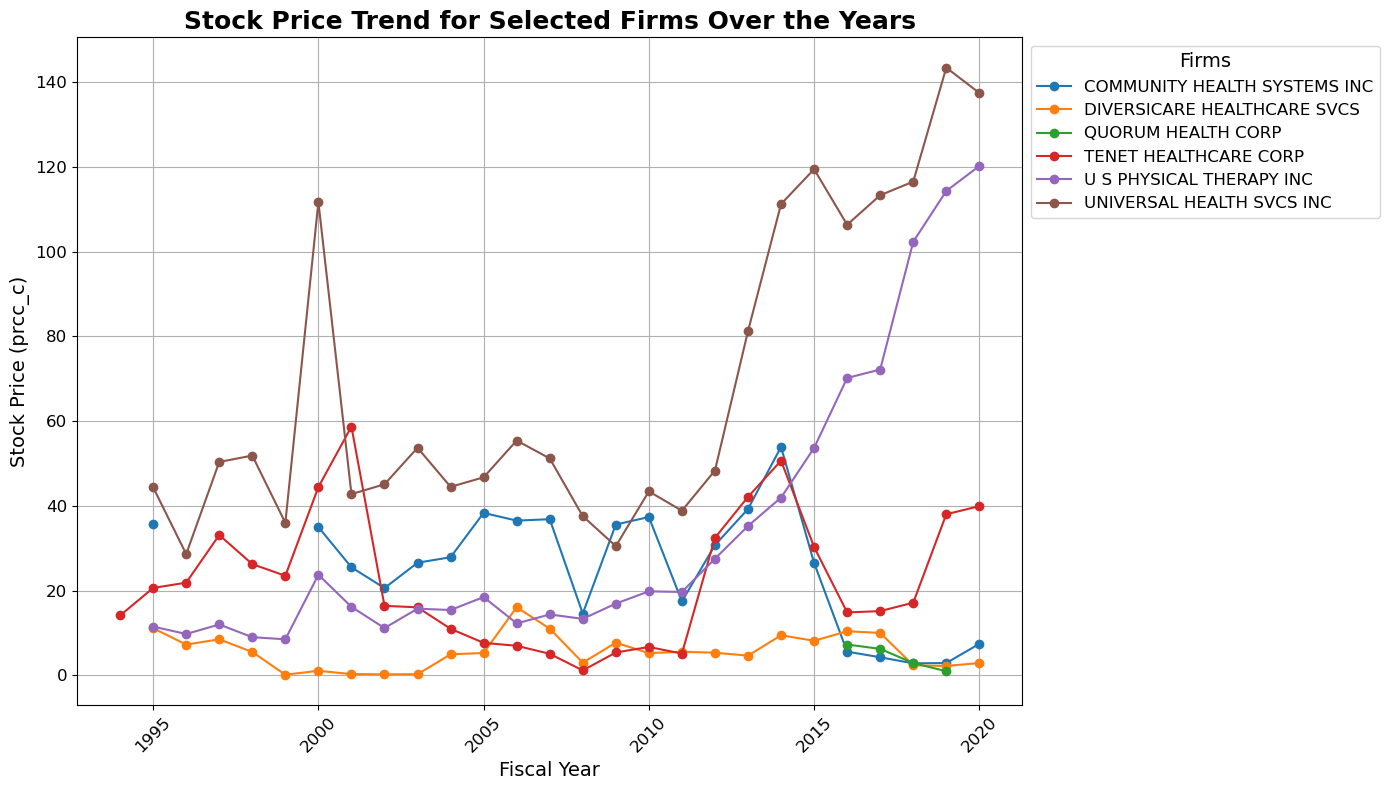

In [80]:
#I used ChatGPT-4 to generate a graph representing the stock price trend for Tenet and its competitors. My prompt was: 'Generate a graph to plot the stock price trend for all the firms in the dataframe "new_selected_firms_df"

import matplotlib.pyplot as plt
import seaborn as sns

# Reset to default style (get rid of seaborn darkgrid)
plt.style.use('default')

# Extract the necessary columns
firm_data = new_selected_firms_df[['gvkey', 'fyear', 'prcc_c', 'conm']]

# Create a larger figure for the plot
plt.figure(figsize=(14, 8))

# Use a color palette for distinct firm lines
palette = sns.color_palette("tab10", n_colors=len(firm_data['conm'].unique()))

# Plot for each firm
for i, (firm_name, group) in enumerate(firm_data.groupby('conm')):
    plt.plot(group['fyear'], group['prcc_c'], marker='o', linestyle='-', color=palette[i], label=firm_name)

# Add labels and title with larger fonts
plt.xlabel('Fiscal Year', fontsize=14)
plt.ylabel('Stock Price (prcc_c)', fontsize=14)
plt.title('Stock Price Trend for Selected Firms Over the Years', fontsize=18, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adjust the legend position and appearance
plt.legend(title="Firms", title_fontsize=14, fontsize=12, loc='upper left', bbox_to_anchor=(1, 1), frameon=True)

# Tight layout for better spacing
plt.tight_layout()
plt.grid()
plt.savefig("CA_stockprice")
# Show the plot
plt.show()


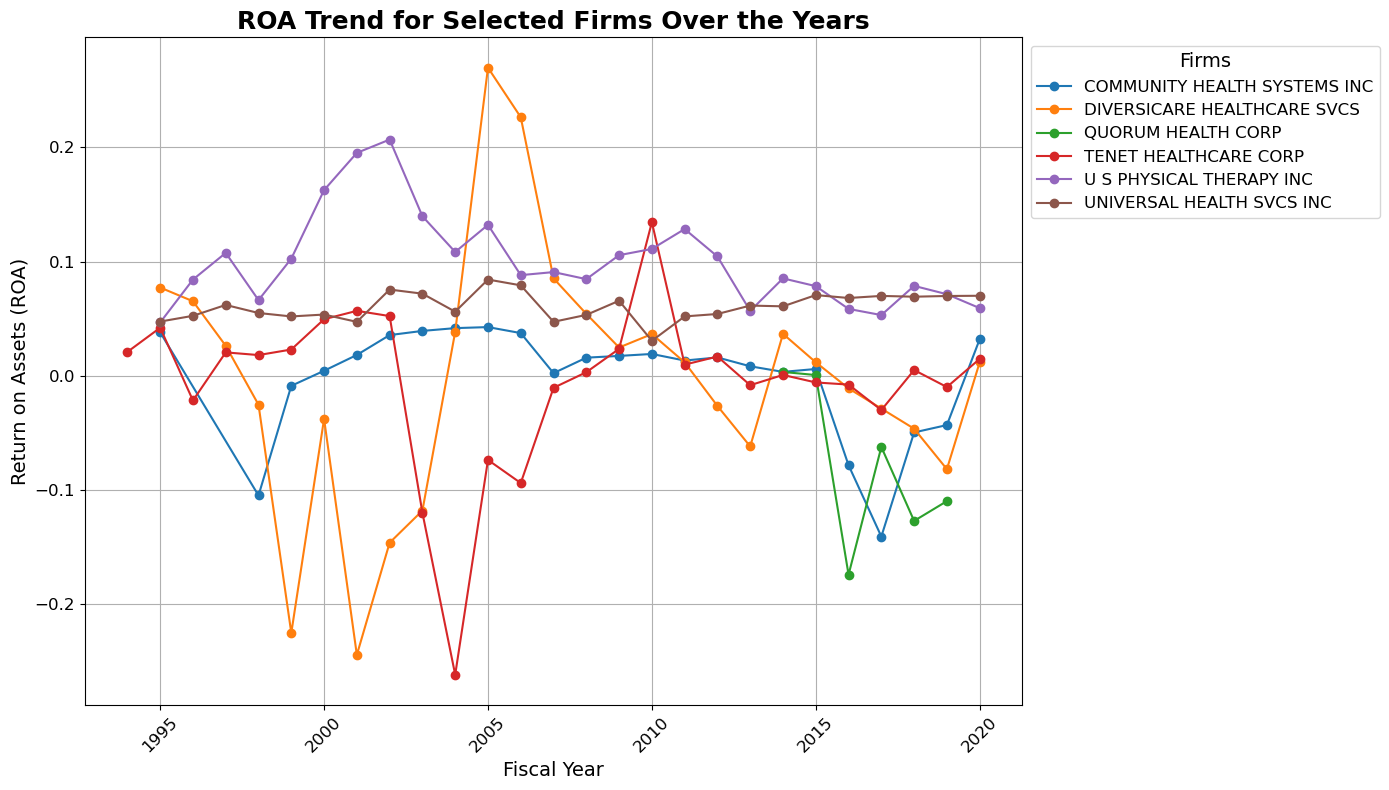

In [81]:
#I used ChatGPT-4 to generate a graph representing the ROA trend for Tenet and its competitors. My prompt was: 'Generate a graph to plot the ROA trend for all the firms in the dataframe "new_selected_firms_df"


import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot (default clean look)
plt.style.use('default')

# Extract the necessary columns for the plot
firm_data = new_selected_firms_df[['gvkey', 'fyear', 'roa', 'conm']]

# Create a larger figure for the plot
plt.figure(figsize=(14, 8))

# Use a color palette for distinct firm lines
palette = sns.color_palette("tab10", n_colors=len(firm_data['conm'].unique()))

# Plot for each firm based on 'conm' (company name)
for i, (firm_name, group) in enumerate(firm_data.groupby('conm')):
    plt.plot(group['fyear'], group['roa'], marker='o', linestyle='-', color=palette[i], label=firm_name)

# Add labels and title with larger fonts
plt.xlabel('Fiscal Year', fontsize=14)
plt.ylabel('Return on Assets (ROA)', fontsize=14)
plt.title('ROA Trend for Selected Firms Over the Years', fontsize=18, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adjust the legend position and appearance
plt.legend(title="Firms", title_fontsize=14, fontsize=12, loc='upper left', bbox_to_anchor=(1, 1), frameon=True)

# Tight layout for better spacing
plt.tight_layout()
plt.grid()
plt.savefig("CA_roa")
# Show the plot
plt.show()


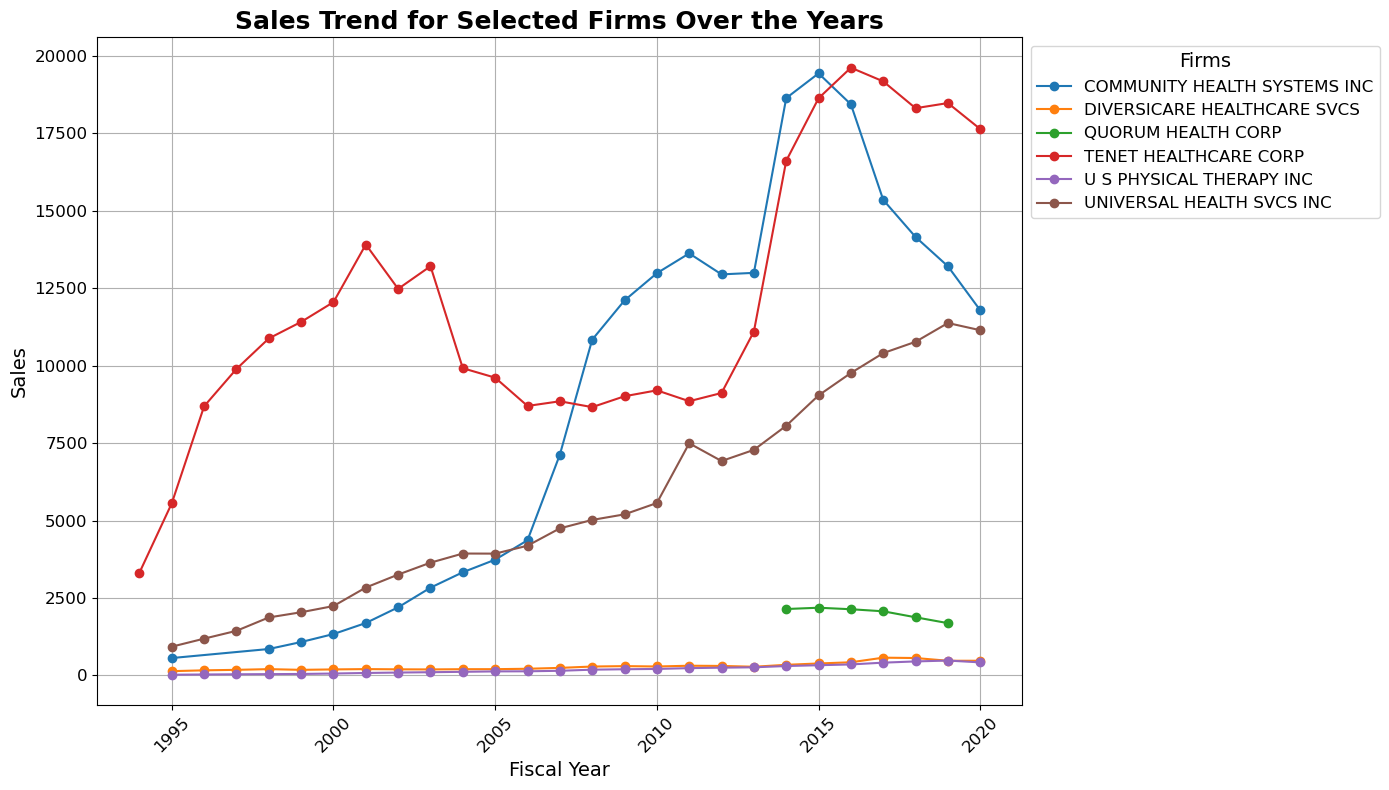

In [82]:
##I used ChatGPT-4 to generate a graph representing the sales trend for Tenet and its competitors. My prompt was: 'Generate a graph to plot the sales trend for all the firms in the dataframe "new_selected_firms_df"


import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot (default clean look)
plt.style.use('default')

# Extract the necessary columns for the plot
firm_data = new_selected_firms_df[['gvkey', 'fyear', 'sale', 'conm']]

# Create a larger figure for the plot
plt.figure(figsize=(14, 8))

# Use a color palette for distinct firm lines
palette = sns.color_palette("tab10", n_colors=len(firm_data['conm'].unique()))

# Plot for each firm based on 'conm' (company name)
for i, (firm_name, group) in enumerate(firm_data.groupby('conm')):
    plt.plot(group['fyear'], group['sale'], marker='o', linestyle='-', color=palette[i], label=firm_name)

# Add labels and title with larger fonts
plt.xlabel('Fiscal Year', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.title('Sales Trend for Selected Firms Over the Years', fontsize=18, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adjust the legend position and appearance
plt.legend(title="Firms", title_fontsize=14, fontsize=12, loc='upper left', bbox_to_anchor=(1, 1), frameon=True)

# Tight layout for better spacing
plt.tight_layout()
plt.grid()
plt.savefig("CA_sales")
# Show the plot
plt.show()


In [83]:
# Choosing the Firm
chosen_firm_gvkey = 7750     # Tenet Healthcare Corporation

In [84]:
# exploring the firm financial data

chosen_firm_financial = selected_sector_firms[selected_sector_firms['gvkey'] == chosen_firm_gvkey]

chosen_firm_financial.describe()

,gvkey,fyear,sic,prcc_c,ch,ni,asset,sale,roa
count,27.0,27.000000,27.0,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,7750.0,2007.000000,8062.0,22.400648,443.148148,-66.777778,14015.111111,11960.740741,-0.005685
std,0.0,7.937254,0.0,15.561923,510.029539,743.139718,6135.441125,4408.969796,0.070535
min,7750.0,1994.000000,8062.0,1.150000,23.000000,-2640.000000,7918.000000,3318.000000,-0.261957
25%,7750.0,2000.500000,8062.0,9.320000,113.000000,-212.000000,8519.500000,8934.000000,-0.010270
50%,7750.0,2007.000000,8062.0,17.140000,356.000000,82.000000,12774.000000,10880.000000,0.004953
75%,7750.0,2013.500000,8062.0,32.797500,615.000000,281.500000,17135.500000,15264.000000,0.021893
max,7750.0,2020.000000,8062.0,58.720000,2446.000000,1143.000000,27106.000000,19621.000000,0.134471


In [85]:
# Analyzing the firms financial behavior over time 

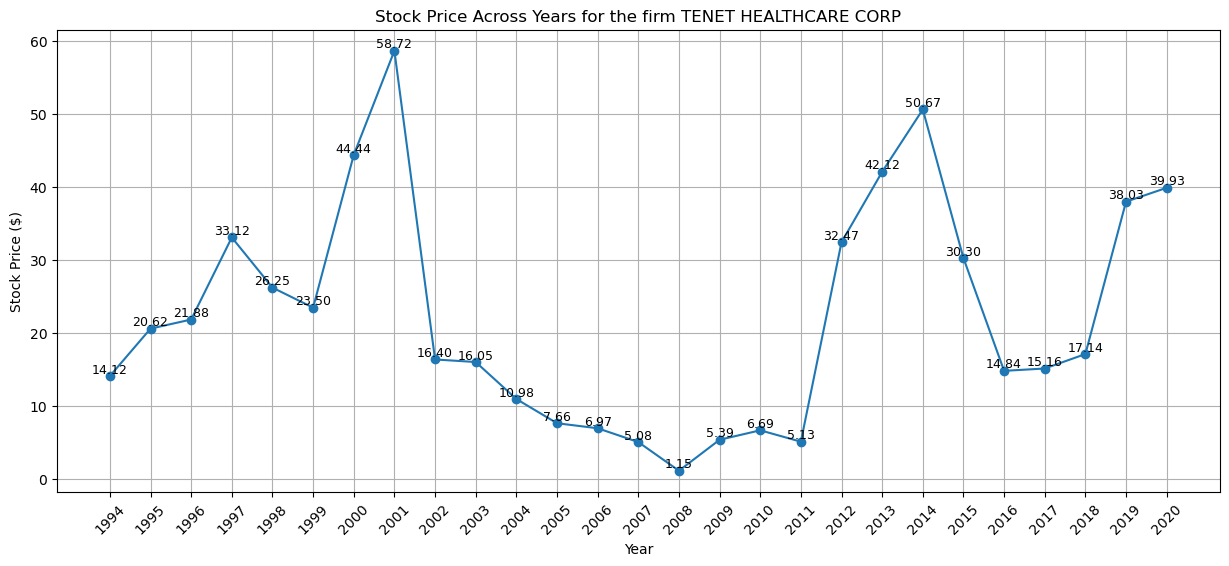

In [86]:
# Ploting the stock price over time

plt.figure(figsize=(15, 6))
plt.plot(chosen_firm_financial['fyear'], chosen_firm_financial['prcc_c'], marker='o')
for i in range(len(chosen_firm_financial)):
    plt.text(
        chosen_firm_financial['fyear'].iloc[i], 
        chosen_firm_financial['prcc_c'].iloc[i], 
        f'{chosen_firm_financial["prcc_c"].iloc[i]:.2f}',  # Format as (x, y)
        fontsize=9,
        ha='center',  # Horizontal alignment
        va='bottom'   # Vertical alignment
    )
plt.title(f'Stock Price Across Years for the firm {chosen_firm_financial.iloc[0]['conm']}')
plt.xlabel('Year')
plt.ylabel('Stock Price ($)')
plt.xticks(selected_sector_firms['fyear'].unique(), rotation=45)
plt.grid()
plt.show()

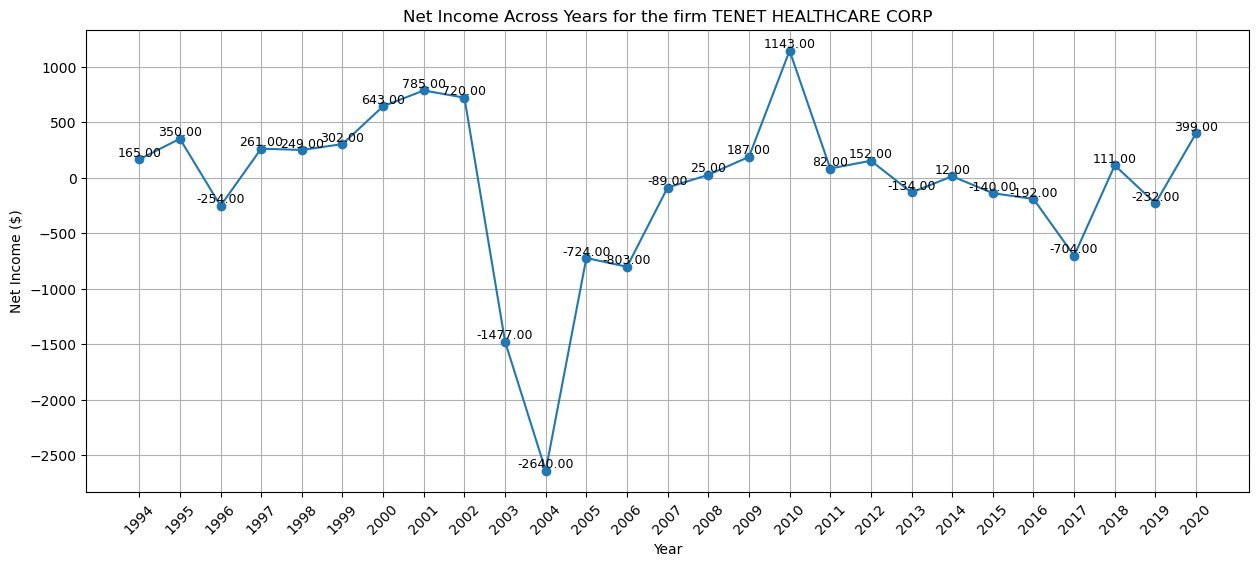

In [87]:
# Ploting the net income over time

plt.figure(figsize=(15, 6))
plt.plot(chosen_firm_financial['fyear'], chosen_firm_financial['ni'], marker='o')
for i in range(len(chosen_firm_financial)):
    plt.text(
        chosen_firm_financial['fyear'].iloc[i], 
        chosen_firm_financial['ni'].iloc[i], 
        f'{chosen_firm_financial["ni"].iloc[i]:.2f}',  # Format as (x, y)
        fontsize=9,
        ha='center',  # Horizontal alignment
        va='bottom'   # Vertical alignment
    )
plt.title(f'Net Income Across Years for the firm {chosen_firm_financial.iloc[0]['conm']}')
plt.xlabel('Year')
plt.ylabel('Net Income ($)')
plt.xticks(selected_sector_firms['fyear'].unique(), rotation=45)
plt.grid()
plt.show()

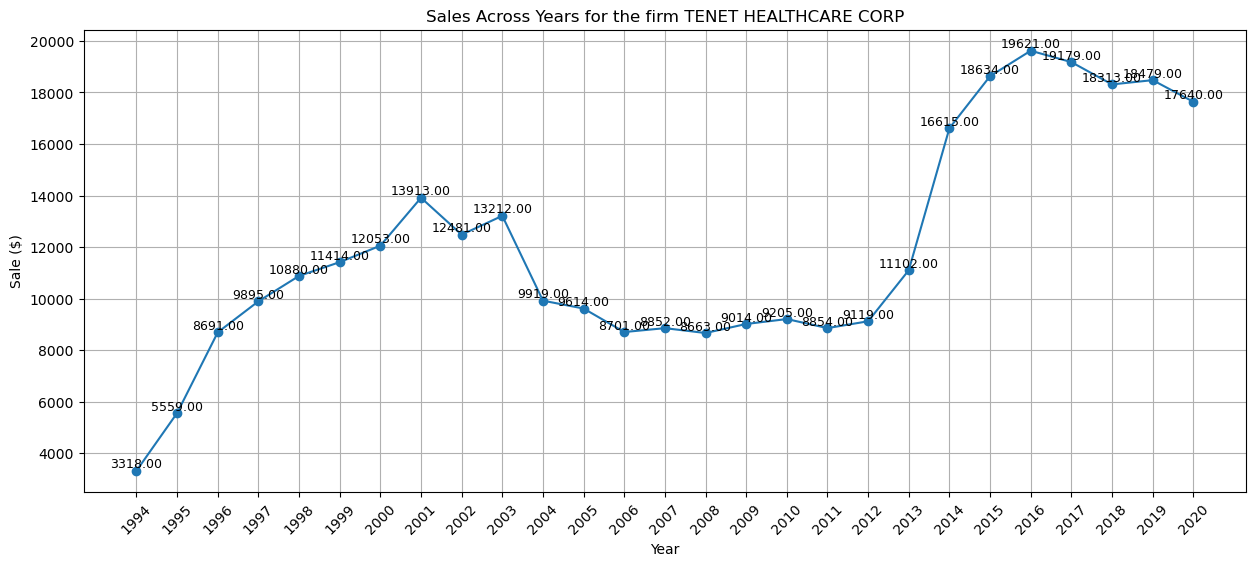

In [88]:
# Ploting the sales over time

plt.figure(figsize=(15, 6))
plt.plot(chosen_firm_financial['fyear'], chosen_firm_financial['sale'], marker='o')
for i in range(len(chosen_firm_financial)):
    plt.text(
        chosen_firm_financial['fyear'].iloc[i], 
        chosen_firm_financial['sale'].iloc[i], 
        f'{chosen_firm_financial["sale"].iloc[i]:.2f}',  # Format as (x, y)
        fontsize=9,
        ha='center',  # Horizontal alignment
        va='bottom'   # Vertical alignment
    )
plt.title(f'Sales Across Years for the firm {chosen_firm_financial.iloc[0]['conm']}')
plt.xlabel('Year')
plt.ylabel('Sale ($)')
plt.xticks(selected_sector_firms['fyear'].unique(), rotation=45)
plt.grid()
plt.show()

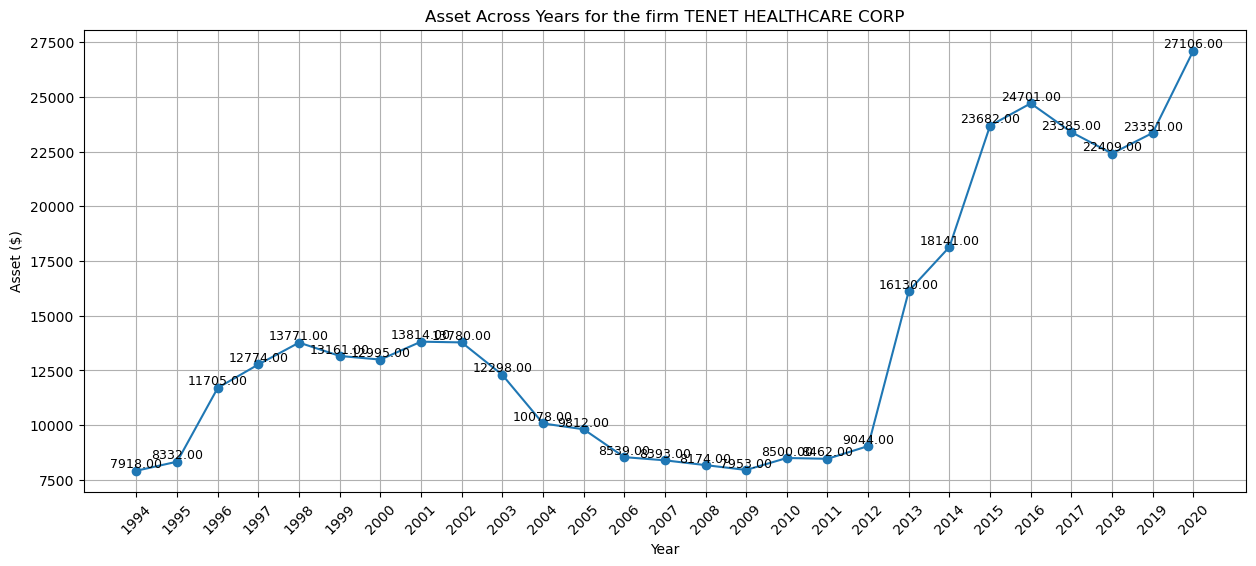

In [89]:
# Ploting the asset over time

plt.figure(figsize=(15, 6))
plt.plot(chosen_firm_financial['fyear'], chosen_firm_financial['asset'], marker='o')
for i in range(len(chosen_firm_financial)):
    plt.text(
        chosen_firm_financial['fyear'].iloc[i], 
        chosen_firm_financial['asset'].iloc[i], 
        f'{chosen_firm_financial["asset"].iloc[i]:.2f}',  # Format as (x, y)
        fontsize=9,
        ha='center',  # Horizontal alignment
        va='bottom'   # Vertical alignment
    )
plt.title(f'Asset Across Years for the firm {chosen_firm_financial.iloc[0]['conm']}')
plt.xlabel('Year')
plt.ylabel('Asset ($)')
plt.xticks(selected_sector_firms['fyear'].unique(), rotation=45)
plt.grid()
plt.show()